### Part 2: Basic Inferential Data Analysis Instructions ###

Now in the second portion of the project, we're going to analyze the ToothGrowth data in the R datasets package.

* Load the ToothGrowth data and perform some basic exploratory data analyses
* Provide a basic summary of the data.
* Use confidence intervals and/or hypothesis tests to compare tooth growth by supp and dose. (Only use the techniques from class, even if there's other approaches worth considering)
* State your conclusions and the assumptions needed for your conclusions.

* Load required packages.
* Load required data: Dataset - The Effect of Vitamin C on Tooth Growth in Guinea Pigs.

In [13]:
require(ggplot2)
data(ToothGrowth)

#### Exploring the Data (Question 1 and 2) ####
Description The response is the length of odontoblasts (teeth) in each of 10 guinea pigs at each of three dose levels of Vitamin C (0.5, 1, and 2 mg) with each of two delivery methods (orange juice or ascorbic acid).

In [2]:
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [3]:
ToothGrowth$dose <- as.factor(ToothGrowth$dose)
summary(ToothGrowth)

      len        supp     dose   
 Min.   : 4.20   OJ:30   0.5:20  
 1st Qu.:13.07   VC:30   1  :20  
 Median :19.25           2  :20  
 Mean   :18.81                   
 3rd Qu.:25.27                   
 Max.   :33.90                   

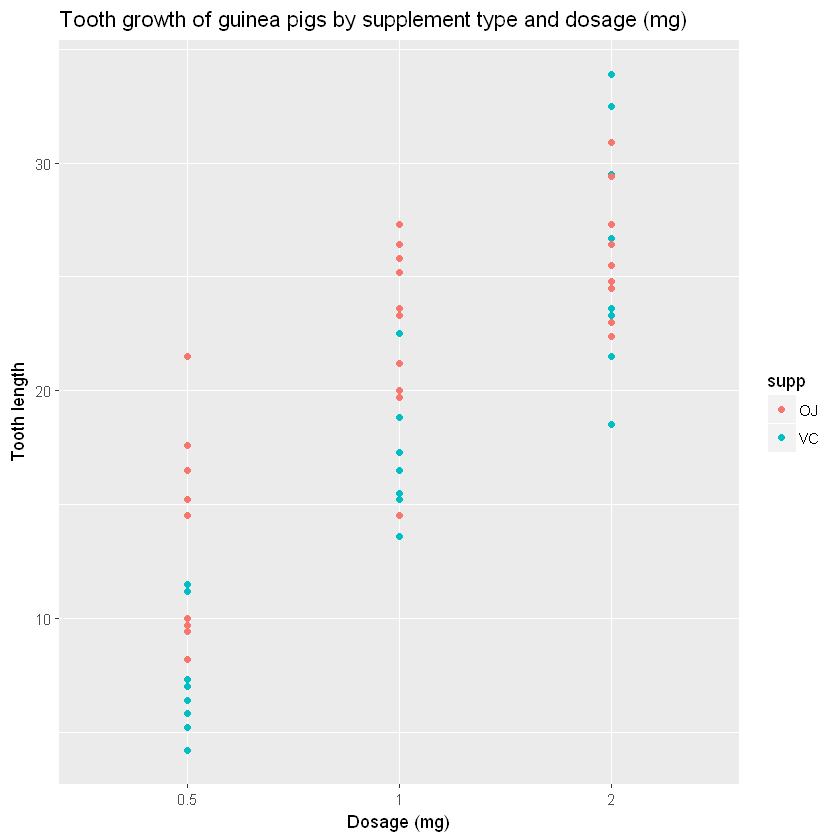

In [4]:
# Basic plot
qplot(dose ,len ,data = ToothGrowth, 
      col = supp, 
      main = "Tooth growth of guinea pigs by supplement type and dosage (mg)", 
      xlab = "Dosage (mg)", 
      ylab = "Tooth length")

** To see the difference better, let’s put the same data in a box-plot-style graph. (remark: to have the facets, it was a good idea to re-format the dose variable) ** 

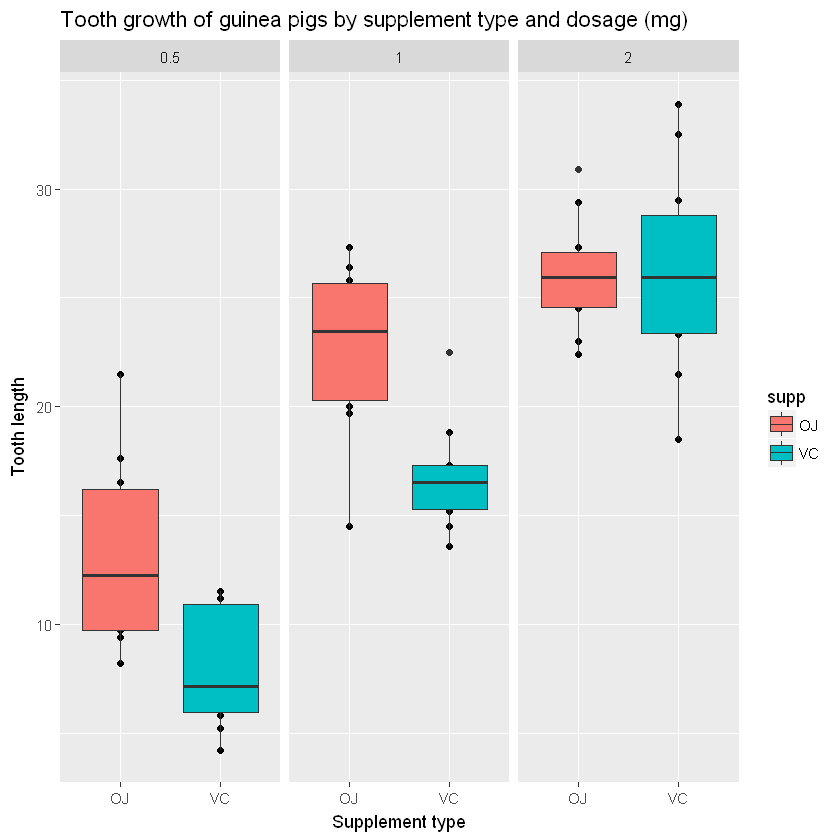

In [5]:
qplot(supp, len, data = ToothGrowth, 
      facets = ~dose, 
      main = "Tooth growth of guinea pigs by supplement type and dosage (mg)", 
      xlab = "Supplement type", 
      ylab = "Tooth length") + 
        geom_boxplot(aes(fill = supp))

* we see that the OJ generally is doing better in each dosage compared to VC
* increasing the dosage (from 0.5, to 1, to 2) increased the length of the tooth, for both supplement types.

#### 3. Use confidence intervals and/or hypothesis tests to compare tooth growth by supp and dose. ####

** Hypothesis 1**

    a) Let the null hypothesis be, that there is no difference in tooth growth given OJ or VC.
    b) Let the alternative hyptohesis be, that tooth growth is bigger when usign OJ, than VC.

In [6]:
VC.length <- ToothGrowth$len[ToothGrowth$supp == "VC"]
OJ.length <- ToothGrowth$len[ToothGrowth$supp == "OJ"]

In [7]:
t.test(OJ.length, VC.length, 
       alternative = "greater", # testing hypothesis if OJ is *greater* than VC
       paired = FALSE, # the data point are not paired with each other
       var.equal = FALSE, # the variances are not equal
       conf.level = 0.95) # a 95% confidence itnerval is "the way to go", if nothing else is defined


	Welch Two Sample t-test

data:  OJ.length and VC.length
t = 1.9153, df = 55.309, p-value = 0.03032
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.4682687       Inf
sample estimates:
mean of x mean of y 
 20.66333  16.96333 


*** The p-values of this comparison is p = 3%, lower than 5%. We reject the null hypothesis. In other words: The chance that the null hypothesis (no difference in growth between OJ and VC) is true and that the data turned out as it is (one can see that there is a clear difference between OJ and VC), is 3%, which is too low to accept.
So we conclude that the alternative hypothesis is true: OJ has a greater impact on tooth growth than VC.***

** Hypothesis 2 **

For this case, let the null hypothesis be the case, where there is no difference in growth looking at the different doses.

In [8]:
dose_0.5 <- ToothGrowth$len[ToothGrowth$dose == "0.5"]
dose_1   <- ToothGrowth$len[ToothGrowth$dose == "1"]
dose_2   <- ToothGrowth$len[ToothGrowth$dose == "2"]

** Step 1: perform a t-test between dose_0.5 and dose_1 **

In [9]:
t.test(dose_0.5, dose_1, 
       alternative = "less", # is the alterntavie that dose_0.5 has a smaller mean than dose_1 (which should be true, looking at the graphics before)
       paired = FALSE, # the data point are not paired with each other
       var.equal = FALSE, # the variances are not equal
       conf.level = 0.95)


	Welch Two Sample t-test

data:  dose_0.5 and dose_1
t = -6.4766, df = 37.986, p-value = 6.342e-08
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -6.753323
sample estimates:
mean of x mean of y 
   10.605    19.735 


The p-value is very small (6.342e-8), therefore we can conclude that the null hypothesis can be rejected looking at dose_0.5 and dose_1.

** Let’s look at the next “dose step”, the one between dose_1 and dose_2: **

In [10]:
t.test(dose_1, dose_2, 
       alternative = "less", # is the alterntavie that dose_1 has a smaller mean than dose_2 (here as well: which should be true, looking at the graphics before)
       paired = FALSE, # the data point are not paired with each other
       var.equal = FALSE, # the variances are not equal
       conf.level = 0.95)


	Welch Two Sample t-test

data:  dose_1 and dose_2
t = -4.9005, df = 37.101, p-value = 9.532e-06
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf -4.17387
sample estimates:
mean of x mean of y 
   19.735    26.100 


Here too, the p-value is very small, therefore we can safely reject the null hypothesis.
We can conclude that the higher the dosage gets, the bigger the tooth growth gets ( = alternative hypothesis).


Conclusion
We can summarize that
- there is (at least) a 95% confidence that by increasing the dosage from 0.5 to 1mg and from 1 to 2mg, increases the tooth length.
- there is (at least) a 95% confidence that giving the supplement OJ (Orange Juice) increases the tooth length more significant than giving VC (Vitamin C)